In [111]:
import cv2
import numpy as np
from skimage.measure import compare_ssim as ssim
from skimage.measure import compare_mse as mse
%matplotlib inline
import matplotlib.pyplot as plt

# IMPORT PRE-TRAIN MODEL FOR FACE RECOGNITION

In [112]:
face_cascade = cv2.CascadeClassifier('/usr/local/share/opencv4/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/usr/local/share/opencv4/haarcascades/haarcascade_eye.xml')

# IMPORT IMAGE AND CONVERT TO GRAY SCALE IMAGE

In [150]:
cmnd = cv2.imread('/mnt/96E070D5E070BD55/Final Project/Data/CMND/hh1_cmnd.jpg')
self = cv2.imread('/mnt/96E070D5E070BD55/Final Project/Data/Shelphie/hh1_shelphie.jpg')
gray_cmnd = cv2.cvtColor(cmnd, cv2.COLOR_BGR2GRAY)
gray_self = cv2.cvtColor(self, cv2.COLOR_BGR2GRAY)

# DETECT FACE AND EYES IN IMAGE

In [151]:
faces_cmnd = face_cascade.detectMultiScale(gray_cmnd, 1.3, 5)
faces_self = face_cascade.detectMultiScale(gray_self, 1.3, 5)

# CUTTING FACE DETECTED FROM IMAGE


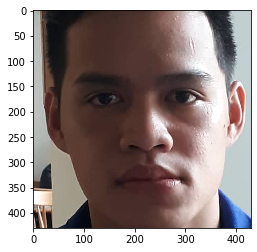

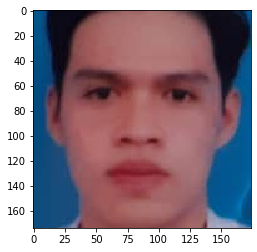

In [152]:
x_cmnd,y_cmnd,w_cmnd,h_cmnd = faces_cmnd[0]
face_cmnd = cmnd[y_cmnd:y_cmnd+h_cmnd, x_cmnd:x_cmnd+w_cmnd]
face_cmnd=cv2.cvtColor(face_cmnd,cv2.COLOR_BGR2RGB)

x_self,y_self,w_self,h_self = faces_self[0]
face_self = self[y_self:y_self+h_self, x_self:x_self+w_self]
face_self=cv2.cvtColor(face_self,cv2.COLOR_BGR2RGB)
show =[]

show.append(face_self)
show.append(face_cmnd)
for i in show:
    plt.imshow(i)
    plt.show()
    

# COMPUTE SSIM AND MSE

In [153]:
if (face_cmnd.shape == face_self.shape):
    acuracy = ssim(face_cmnd,face_self,multichannel=True)*100
    mse_compute = mse(face_cmnd,face_self)
else:
    w = min(face_cmnd.shape[0], face_self.shape[0])
    h = min(face_cmnd.shape[1], face_self.shape[1])
    dim = (w,h)
    face_cmnd_resize = cv2.resize(face_cmnd,dim)
    face_self_resize = cv2.resize(face_self,dim)
    acuracy = ssim(face_cmnd_resize, face_self_resize, multichannel=True) * 100
    mse_compute = mse(face_cmnd_resize, face_self_resize)
print('acuracy =',acuracy)
print('mse =',mse_compute)

acuracy = 32.89777614713053
mse = 7354.351290350993
